<a href="https://colab.research.google.com/github/y33-j3T/Data-Structure/blob/master/Classifying_Images_of_Clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Images of Clothing

## Install and import dependencies

Install [TensorFlow Datasets](https://www.tensorflow.org/datasets/) - API that simplifies downloading and accessing datasets

In [8]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.0.1)


In [9]:
from __future__ import absolute_import, division, print_function

# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)
tf.enable_eager_execution()

1.13.1


## Import Fashion MNIST dataset

 ### Overview of [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset
 - 70, 000 grayscale images
 - 10 categories
 - Individual articles of clothing at low resolution (28 $\times$ 28 pixels)
 
 <table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="600">
    <td></tr>
  </table>
  
   <p align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist"> Fashion-MNIST samples</a>
  </p>
  

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

<p align="center">
  <b>Table 1.</b>
  <a> 10 categorical class </a>
</p>

In [0]:
#Store `class_names` for later use
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Load data
- Dataset - `dataset`
- Metadata - `metadata`
- Train set - `train_dataset`
- Test set - `test_dataset`

In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

### Explore the data

In [12]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of train examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of train examples: 60000
Number of test examples: 10000


## Preprocess the data

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

### Explore the processed data

Display a single image

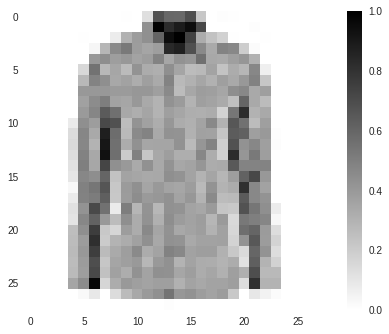

In [23]:
# Take a single image, remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

1. Display first 25 image from the *training set*
2. Display class name below each image
3. Verify data in correct format

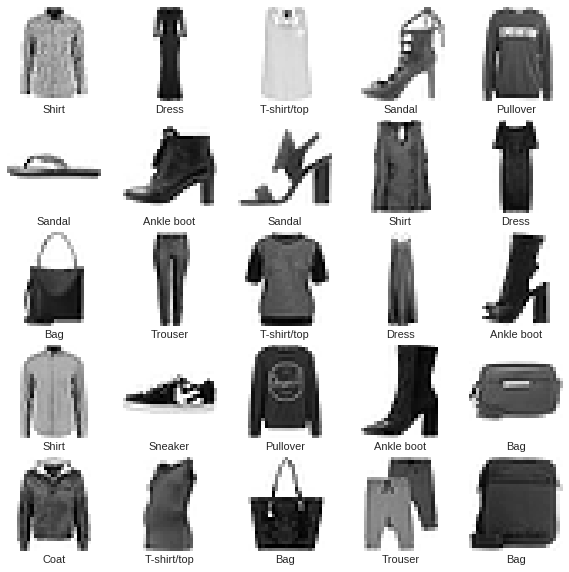

In [44]:
plt.figure(figsize=(10,10))
i=0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

## Build the model
1. Configure layers of model
2. Compile the model

### Setup the layers

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

This network has 3 layers:
- **input** tf.keras.layers.Flatten
      - 